### Data Preprocessing

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# reading data from dat file storing it pandas dataframe
air_data = pd.read_table('airfoil_self_noise.dat')
air_data.rename(columns={'800':'Frequency (Hz)', '0':'Angle of attack (Degrees)', '0.3048':'Chord length (m)', 
                   '71.3':'Free-stream velocity (m/s)', '0.00266337':'Displacement thickness (m)', '126.201':'Sound Pressure (dB)'}, inplace=True)
air_data.at['1502',:]=800,0,0.3048,71.3,0.00266337,126.201

In [266]:
air_data.tail()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Displacement thickness (m),Sound Pressure (dB)
1498,3150.0,15.6,0.1016,39.6,0.052849,109.254
1499,4000.0,15.6,0.1016,39.6,0.052849,106.604
1500,5000.0,15.6,0.1016,39.6,0.052849,106.224
1501,6300.0,15.6,0.1016,39.6,0.052849,104.204
1502,800.0,0.0,0.3048,71.3,0.002663,126.201


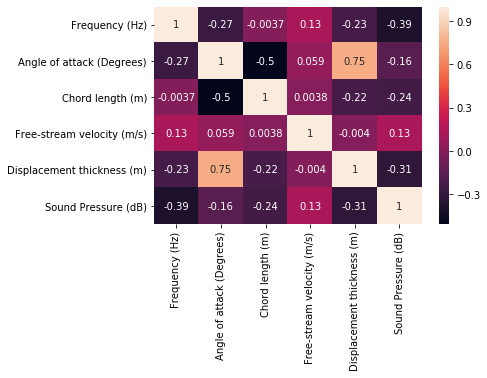

In [267]:
# observing correlation of all features with the label 
sns.heatmap(air_data.corr(), annot=True)       
plt.show()  # we can see that Temperature, Humidity & Visibility have significant relationship with Apparent Temper

In [268]:
# taking only columns that have significant correlation
del air_data['Free-stream velocity (m/s)']       # dropping free-stream velocity
del air_data['Angle of attack (Degrees)']       # dropping angle of attack column
air_data.head()

,Frequency (Hz),Chord length (m),Displacement thickness (m),Sound Pressure (dB)
0,1000.0,0.3048,0.002663,125.201
1,1250.0,0.3048,0.002663,125.951
2,1600.0,0.3048,0.002663,127.591
3,2000.0,0.3048,0.002663,127.461
4,2500.0,0.3048,0.002663,125.571


In [269]:
air_data.isna().sum()   # checking for null values

Frequency (Hz)                0
Chord length (m)              0
Displacement thickness (m)    0
Sound Pressure (dB)           0
dtype: int64

#### Handling Outliers

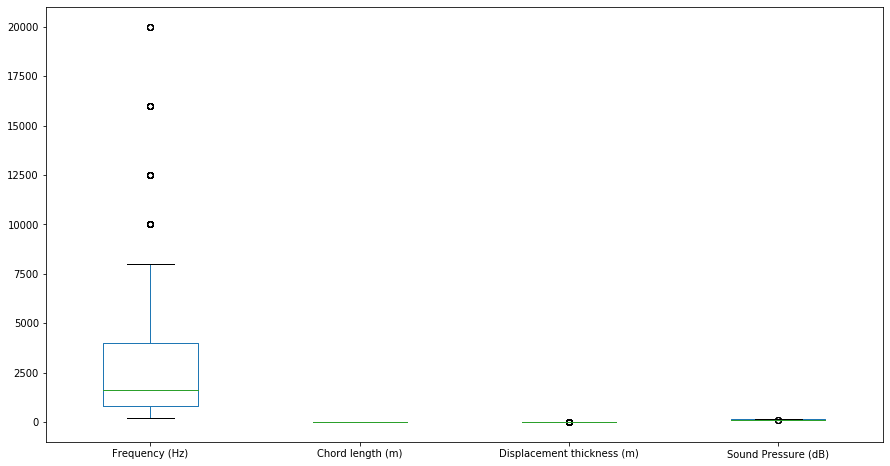

In [270]:
air_data.plot(kind='box',figsize=(15,8))  # checking outliers
plt.show()

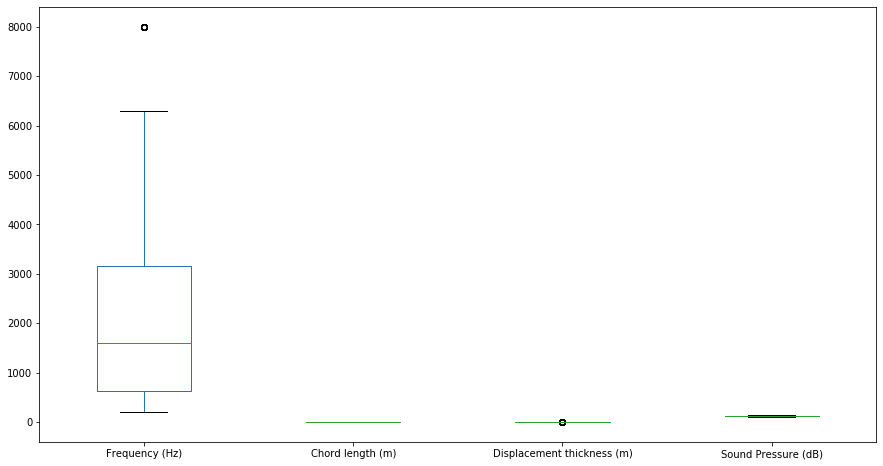

In [271]:
for col in air_data.columns:
    quartile1 = air_data[col].quantile(0.25)
    quartile3 = air_data[col].quantile(0.75)
    IQR = quartile3 - quartile1        # Inter-quartile range
    # getting indices of outliers as we can see ouliers are at lower end only getting those only
    outliers = air_data.loc[(air_data[col] < (quartile1 - 1.5*IQR)) | (air_data[col] > (quartile3 + 1.5*IQR))].index
    air_data = air_data.drop(outliers)
air_data.plot(kind='box',figsize=(15,8))
plt.show()

In [272]:
air_data.describe()      # observing scale of different variables

,Frequency (Hz),Chord length (m),Displacement thickness (m),Sound Pressure (dB)
count,1323.000000,1323.000000,1323.000000,1323.000000
mean,2350.461073,0.137828,0.009113,125.754003
std,2081.043278,0.095615,0.009423,6.273820
min,200.000000,0.025400,0.000401,108.185000
25%,630.000000,0.050800,0.002663,121.357500
50%,1600.000000,0.101600,0.004850,126.508000
75%,3150.000000,0.228600,0.013025,130.361500
max,8000.000000,0.304800,0.036823,140.987000


#### Feature scaling 

In [273]:
# scaling all features in range 1-10
for col in ['Frequency (Hz)', 'Chord length (m)', 'Displacement thickness (m)']:
    minimum = air_data[col].min()
    maximum = air_data[col].max()
    air_data[col]= (air_data[col] - minimum)*10/(maximum - minimum)
    
air_data.head()

,Frequency (Hz),Chord length (m),Displacement thickness (m),Sound Pressure (dB)
0,1.025641,10.0,0.621232,125.201
1,1.346154,10.0,0.621232,125.951
2,1.794872,10.0,0.621232,127.591
3,2.307692,10.0,0.621232,127.461
4,2.948718,10.0,0.621232,125.571


In [274]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train = air_data.sample(frac=0.7, random_state=3)   # selecting random 0.7 fraction of dataset as train set   
# chossing different random state will give different random rows
test = air_data.drop(train.index)            # selecting remaining i.e. 30% as test set
print('Train set')
print(train.shape)
train.head()

Train set
(926, 4)


,Frequency (Hz),Chord length (m),Displacement thickness (m),Sound Pressure (dB)
591,3.782051,4.545455,1.332704,118.291
729,2.948718,0.909091,0.093293,131.310
897,3.782051,0.909091,7.355819,123.460
658,6.153846,4.545455,5.612754,112.065
752,1.346154,0.909091,0.107389,129.148


In [275]:
print('Test set')
print(test.shape)
test.head()

Test set
(397, 4)


,Frequency (Hz),Chord length (m),Displacement thickness (m),Sound Pressure (dB)
2,1.794872,10.0,0.621232,127.591
9,10.000000,10.0,0.621232,117.151
14,0.551282,10.0,0.667203,127.696
15,0.769231,10.0,0.667203,128.086
16,1.025641,10.0,0.667203,126.966


### Bulding model

In [276]:
total= len(train)                # total records in train set
# initialising parameters
theta0 = 0
theta1 = 0
theta2 = 0
theta3 = 0

# creating row matrix of parameters
theta = np.array([theta0, theta1, theta2, theta3])

# creating matrix of independent variables
x_values = np.ones(total)
x_values = np.append(x_values, train['Frequency (Hz)'])
x_values = np.append(x_values, train['Chord length (m)'])
x_values = np.append(x_values, train['Displacement thickness (m)'])
x_values = x_values.reshape(4, total)

y_values = np.array(train['Sound Pressure (dB)'])

# prediction function
predict = lambda x_values: theta.dot(x_values)

# derivative of cost functions
def der_cost0():
    return (predict(x_values) - y_values).sum()/total

def der_cost1():
    return (predict(x_values) - y_values).dot(x_values[1])/total

def der_cost2():
    return (predict(x_values) - y_values).dot(x_values[2])/total

def der_cost3():
    return (predict(x_values) - y_values).dot(x_values[3])/total

alpha = 0.01
iterations = 2000                 # on increasing 

# applying gradient descent alogorithm
for _ in range(iterations):
    temp0 = theta0 - alpha * der_cost0()
    temp1 = theta1 - alpha * der_cost1()
    temp2 = theta2 - alpha * der_cost2()
    temp3 = theta3 - alpha * der_cost3()
    theta0 = temp0
    theta1 = temp1
    theta2 = temp2
    theta3 = temp3
    theta = np.array([theta0, theta1, theta2, theta3])



In [277]:
print(f'theta0: {theta0}   theta1: {theta1}')
print(f'theta2: {theta2}   theta3: {theta3}')

theta0: 128.99600332784846   theta1: -0.668672057298335
theta2: -0.2834573083012013   theta3: -0.5023794044689253


In [278]:
print(f'Predicted line: Sound pressure = {theta0} + ({theta1})*frequency + ({theta2})*chord_length + ({theta3})*displacement_thickness')

Predicted line: Sound pressure = 128.99600332784846 + (-0.668672057298335)*frequency + (-0.2834573083012013)*chord_length + (-0.5023794044689253)*displacement_thickness


### Finding mean square error

In [279]:
# Finding Root mean squared error (RMSE)
mse = ((predict(x_values)- y_values)**2).sum()        # mean squared error
rmse = np.sqrt(mse/total)             # root mean squared error
rmse

5.47690755962555

### Evaluating accuracy against test set

In [280]:
# making predictor variable matrix & target varible array for test set
test_x_values =  np.ones(len(test))
test_x_values = np.append(test_x_values, test['Frequency (Hz)'])
test_x_values = np.append(test_x_values, test['Chord length (m)'])
test_x_values = np.append(test_x_values, test['Displacement thickness (m)'])
test_x_values = test_x_values.reshape(4, len(test))

test_y_values = np.array(test['Sound Pressure (dB)'])

In [281]:
# Using absolute error method we are finding accuracy
total_error = abs(predict(test_x_values) - test_y_values)/test_y_values
(1- total_error.sum()/len(test))*100

96.64427677516034